In [1]:
import pandas as pd

# Load individual datasets
flights_df = pd.read_excel(r"D:\Make_my_trip\FinalDataset\FlightFINALdataset.xlsx")  # Replace with the actual file path
hotels_df =pd.read_excel(r"D:\Make_my_trip\FinalDataset\HotelFINALdataset.xlsx")    # Replace with the actual file path
cars_df =  pd.read_excel(r"D:\Make_my_trip\FinalDataset\CarFINALdataset.xlsx")       # Replace with the actual file path

# Display basic info to check common keys
print("Flights Data:")
print(flights_df.info(), "\n")
print("Hotels Data:")
print(hotels_df.info(), "\n")
print("Cars Data:")
print(cars_df.info(), "\n")


Flights Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   travelCode       40552 non-null  int64  
 1   User_ID          40552 non-null  int64  
 2   Departure        40552 non-null  object 
 3   Arrival          40552 non-null  object 
 4   flightType       40552 non-null  object 
 5   Flight_price     40552 non-null  float64
 6   Flight_duration  40552 non-null  float64
 7   Flight_Distance  40552 non-null  float64
 8   Flight_agency    40552 non-null  object 
 9   Departure_date   40552 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.1+ MB
None 

Hotels Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              40552 non

In [ ]:
# Merge flights and hotels data on 'User_ID' and 'travelCode'
merged_df = pd.merge(flights_df, hotels_df, on=['User_ID', 'travelCode'], how='inner')

# Merge the result with car data (some users may not have booked a car, so use left join)
final_df = pd.merge(merged_df, cars_df, on=['User_ID', 'travelCode'], how='left')

# Fill NaN values for users who didn't book a car
final_df['Car_bookingStatus'].fillna('Not Booked', inplace=True)

# Display merged dataset info
print(final_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travelCode           40552 non-null  int64  
 1   User_ID              40552 non-null  int64  
 2   Departure            40552 non-null  object 
 3   Arrival              40552 non-null  object 
 4   flightType           40552 non-null  object 
 5   Flight_price         40552 non-null  float64
 6   Flight_duration      40552 non-null  float64
 7   Flight_Distance      40552 non-null  float64
 8   Flight_agency        40552 non-null  object 
 9   Departure_date       40552 non-null  object 
 10  Hotel_Name           40552 non-null  object 
 11  Arrival_place        40552 non-null  object 
 12  Hotel_stay           40552 non-null  int64  
 13  Hotel_per_day_price  40552 non-null  float64
 14  Check-in_x           40552 non-null  object 
 15  Hotel_TotalPrice     40552 non-null 

C:\Users\hetvi\AppData\Local\Temp\ipykernel_19276\845420387.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Car_bookingStatus'].fillna('Not Booked', inplace=True)


In [4]:
print(final_df.head())

   travelCode  User_ID      Departure             Arrival  flightType  \
0           0        0    Recife (PE)  Florianopolis (SC)  firstClass   
1           2        0   Aracaju (SE)       Salvador (BH)  firstClass   
2           7        0   Aracaju (SE)       Salvador (BH)    economic   
3          11        0  Brasilia (DF)       Salvador (BH)     premium   
4          13        0    Recife (PE)  Florianopolis (SC)  firstClass   

   Flight_price  Flight_duration  Flight_Distance Flight_agency  \
0       1434.38             1.76           676.53   FlyingDrops   
1       1684.05             2.16           830.86       CloudFy   
2        964.83             2.16           830.86       CloudFy   
3       1268.97             1.76           676.56       Rainbow   
4       1434.38             1.76           676.53   FlyingDrops   

  Departure_date  ... Check-in_y pickupLocation  dropoffLocation  carType  \
0     26/09/2019  ...        NaN            NaN              NaN      NaN   
1   

In [3]:
final_df.columns

Index(['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType',
       'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency',
       'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay',
       'Hotel_per_day_price', 'Check-in_x', 'Hotel_TotalPrice', 'Check-in_y',
       'pickupLocation', 'dropoffLocation', 'carType', 'rentalAgency',
       'rentalDuration', 'Car_total_distance', 'fuelPolicy',
       'Car_bookingStatus', 'total_rent_price'],
      dtype='object')

In [10]:
final_df.rename(columns={'Check-in_x':'Check-in_hotel','Check-in_y':'Check-in_car'},inplace= True)

In [11]:
final_df.columns

Index(['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType',
       'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency',
       'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay',
       'Hotel_per_day_price', 'Check-in_hotel', 'Hotel_TotalPrice',
       'Check-in_car', 'pickupLocation', 'dropoffLocation', 'carType',
       'rentalAgency', 'rentalDuration', 'Car_total_distance', 'fuelPolicy',
       'Car_bookingStatus', 'total_rent_price'],
      dtype='object')

In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40552 entries, 0 to 40551
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travelCode           40552 non-null  int64  
 1   User_ID              40552 non-null  int64  
 2   Departure            40552 non-null  object 
 3   Arrival              40552 non-null  object 
 4   flightType           40552 non-null  object 
 5   Flight_price         40552 non-null  float64
 6   Flight_duration      40552 non-null  float64
 7   Flight_Distance      40552 non-null  float64
 8   Flight_agency        40552 non-null  object 
 9   Departure_date       40552 non-null  object 
 10  Hotel_Name           40552 non-null  object 
 11  Arrival_place        40552 non-null  object 
 12  Hotel_stay           40552 non-null  int64  
 13  Hotel_per_day_price  40552 non-null  float64
 14  Check-in_hotel       40552 non-null  object 
 15  Hotel_TotalPrice     40552 non-null  floa

In [14]:
# Fill missing car-related values with appropriate defaults
final_df.loc[:, 'Check-in_car'] = final_df['Check-in_car'].fillna('No Booking')
final_df.loc[:, 'pickupLocation'] = final_df['pickupLocation'].fillna('No Booking')
final_df.loc[:, 'dropoffLocation'] = final_df['dropoffLocation'].fillna('No Booking')
final_df.loc[:, 'carType'] = final_df['carType'].fillna('No Booking')
final_df.loc[:, 'rentalAgency'] = final_df['rentalAgency'].fillna('No Booking')
final_df.loc[:, 'rentalDuration'] = final_df['rentalDuration'].fillna(0)
final_df.loc[:, 'Car_total_distance'] = final_df['Car_total_distance'].fillna(0)
final_df.loc[:, 'fuelPolicy'] = final_df['fuelPolicy'].fillna('No Booking')
final_df.loc[:, 'total_rent_price'] = final_df['total_rent_price'].fillna(0)


# Verify if missing values are handled
print(final_df.isnull().sum())


travelCode             0
User_ID                0
Departure              0
Arrival                0
flightType             0
Flight_price           0
Flight_duration        0
Flight_Distance        0
Flight_agency          0
Departure_date         0
Hotel_Name             0
Arrival_place          0
Hotel_stay             0
Hotel_per_day_price    0
Check-in_hotel         0
Hotel_TotalPrice       0
Check-in_car           0
pickupLocation         0
dropoffLocation        0
carType                0
rentalAgency           0
rentalDuration         0
Car_total_distance     0
fuelPolicy             0
Car_bookingStatus      0
total_rent_price       0
dtype: int64


In [25]:
final_df.head()

,travelCode,User_ID,Departure,Arrival,flightType,Flight_price,Flight_duration,Flight_Distance,Flight_agency,Departure_date,...,pickupLocation,dropoffLocation,carType,rentalAgency,rentalDuration,Car_total_distance,fuelPolicy,Car_bookingStatus,total_rent_price,Anomaly
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,26/09/2019,...,No Booking,No Booking,No Booking,No Booking,0.0,0.0,No Booking,Not Booked,0.0,Normal
1,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,...,No Booking,No Booking,No Booking,No Booking,0.0,0.0,No Booking,Not Booked,0.0,Normal
2,7,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,14/11/2019,...,No Booking,No Booking,No Booking,No Booking,0.0,0.0,No Booking,Not Booked,0.0,Normal
3,11,0,Brasilia (DF),Salvador (BH),premium,1268.97,1.76,676.56,Rainbow,12/12/2019,...,No Booking,No Booking,No Booking,No Booking,0.0,0.0,No Booking,Not Booked,0.0,Normal
4,13,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,26/12/2019,...,No Booking,No Booking,No Booking,No Booking,0.0,0.0,No Booking,Not Booked,0.0,Normal


In [33]:
final_df=final_df.drop(columns=['Anomaly'],axis=1)

In [34]:
final_df.columns

Index(['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType',
       'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency',
       'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay',
       'Hotel_per_day_price', 'Check-in_hotel', 'Hotel_TotalPrice',
       'Check-in_car', 'pickupLocation', 'dropoffLocation', 'carType',
       'rentalAgency', 'rentalDuration', 'Car_total_distance', 'fuelPolicy',
       'Car_bookingStatus', 'total_rent_price'],
      dtype='object')

In [35]:
final_df.to_csv('booking_data.csv',index=False)

# Isolation Forest

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [16]:
# Selecting relevant numerical features
features = ['total_rent_price', 'rentalDuration', 'Car_total_distance']

# Creating a new DataFrame with selected features
df_selected = final_df[features].copy()


In [17]:
# Standardize the numerical features for better anomaly detection
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)


In [18]:
# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model and predict anomalies (-1: anomaly, 1: normal)
final_df['Anomaly'] = iso_forest.fit_predict(df_scaled)

# Map anomalies for better understanding
final_df['Anomaly'] = final_df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})


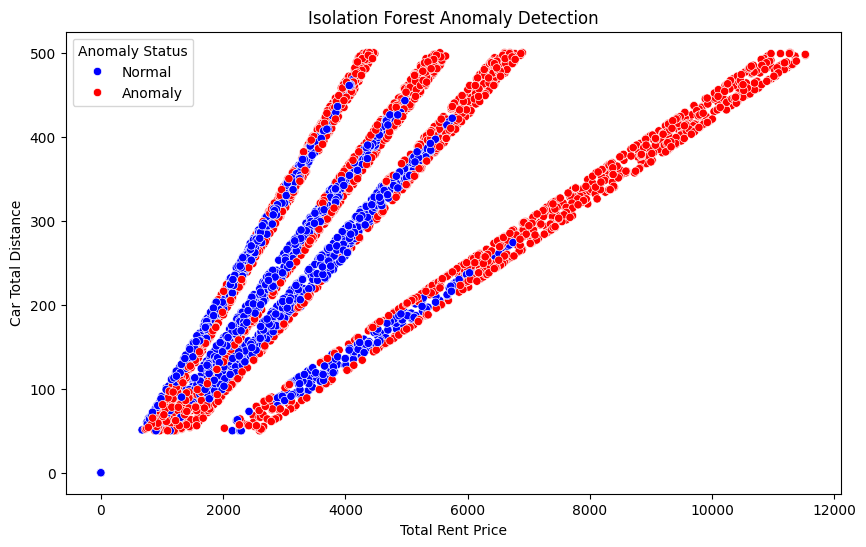

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=final_df['total_rent_price'], 
    y=final_df['Car_total_distance'], 
    hue=final_df['Anomaly'], 
    palette={'Anomaly': 'red', 'Normal': 'blue'}
)
plt.xlabel('Total Rent Price')
plt.ylabel('Car Total Distance')
plt.title('Isolation Forest Anomaly Detection')
plt.legend(title='Anomaly Status')
plt.show()


In [22]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
final_df['Anomaly'] = iso_forest.fit_predict(final_df[['total_rent_price', 'Car_total_distance']])

# Convert anomalies to categorical values for better visualization
final_df['Anomaly'] = final_df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})


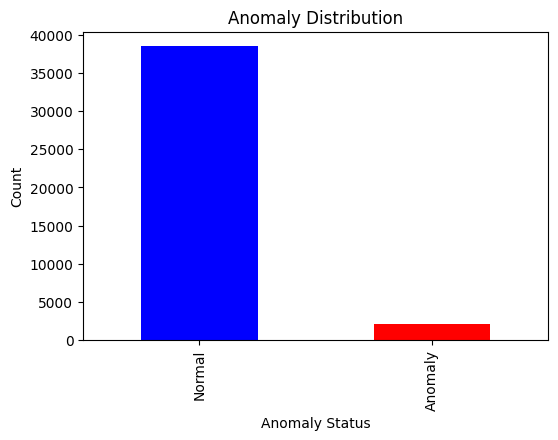

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
final_df['Anomaly'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Anomaly Status')
plt.ylabel('Count')
plt.title('Anomaly Distribution')
plt.show()


In [24]:
anomalies = final_df[final_df['Anomaly'] == 'Anomaly']
print(anomalies.describe())


          travelCode      User_ID  Flight_price  Flight_duration  \
count    2028.000000  2028.000000   2028.000000      2028.000000   
mean    68485.763807   672.635108    930.050784         1.436982   
std     39289.896945   390.083808    371.780811         0.545145   
min       117.000000     2.000000    301.510000         0.440000   
25%     34298.500000   328.000000    629.540000         1.110000   
50%     69133.000000   669.000000    884.670000         1.460000   
75%    102363.500000  1015.000000   1190.940000         1.760000   
max    135892.000000  1337.000000   1754.170000         2.440000   

       Flight_Distance   Hotel_stay  Hotel_per_day_price  Hotel_TotalPrice  \
count      2028.000000  2028.000000          2028.000000       2028.000000   
mean        553.051519     2.523669           214.738994        539.355986   
std         209.816434     1.128599            76.240157        316.705884   
min         168.220000     1.000000            60.390000         60.390000 